In [2]:
import numpy as np
import matplotlib.pyplot as plt

Imports


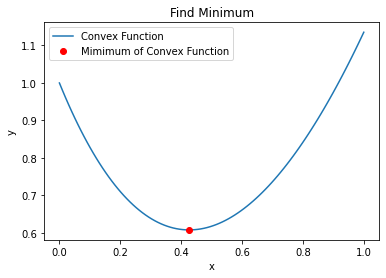

In [4]:
#procedure which determines the minimum of a convex function f in the interval [a, b] using “trisectionof the interval
def trisection(f, a, b, eps):
    while (b - a) > eps:
        c = (a + b)/2
        d = (a + c)/2
        e = (c + b)/2
        if f(d) < f(e):
            b = e
        else:
            a = d
    return (a + b)/2



def f_convex(x):
    alpha = 2
    beta = 2
    return np.exp(-alpha*x)+np.power(x,beta)


a = 0
b = 1

dx = 0.0001
zeros = np.ceil(np.log10(dx))
if zeros > 0:
    zeros = 0
else:
    zeros = int(abs(zeros)+1)
    
minimum = trisection(f_convex,a,b,dx)

x = np.linspace(0,1,100)
y = f_convex(x)
plt.plot(x,y)
plt.plot(minimum,f_convex(minimum),'ro')
plt.title("Find Minimum")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Convex Function","Mimimum of Convex Function"])
plt.show()     